# Flood Prediction Machine Learning Model 

In [1]:
# This Machine Learning Model uses 5 Machine Learning Algorithms namely KNN Classification, Logistic Regression[LR], Support 
# Vector[SVM], Decision Tree[DT] and Random Forest[RF] to get the best possible model to predict the floods using Douala Rainfall Data.

In [2]:
# It will list the files in the input directory.
import os
print(os.listdir(r"C:\Users\SHADO\flood_prediction"))  # Name of the project Directory

['.ipynb_checkpoints', 'Douala.csv', 'Flood_Prediction.ipynb']


In [3]:
# Ignoring Warnings.
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Directory where our Dataset is stored for processing in the ML Model.
os.chdir(r"C:\Users\SHADO\flood_prediction") # Path of our Project Folder
os.getcwd()

'C:\\Users\\SHADO\\flood_prediction'

## Data Insights

#### Importing Required Libraries.

In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
data = pd.read_csv('Douala.csv')
print(data)

       TOWN  YEAR   JAN   FEB   MAR    APR    MAY     JUN     JUL     AUG  \
0    DOUALA  1901  28.7  44.7  51.6  160.0  174.7   824.6   743.0   357.5   
1    DOUALA  1902   6.7   2.6  57.3   83.9  134.5   390.9  1205.0   315.8   
2    DOUALA  1903   3.2  18.6   3.1   83.6  249.7   558.6  1022.5   420.2   
3    DOUALA  1904  23.7   3.0  32.2   71.5  235.7  1098.2   725.5   351.8   
4    DOUALA  1905   1.2  22.3   9.4  105.9  263.3   850.2   520.5   293.6   
..      ...   ...   ...   ...   ...    ...    ...     ...     ...     ...   
113  DOUALA  2014   4.6  10.3  17.9   95.7  251.0   454.4   677.8   733.9   
114  DOUALA  2015   3.1   5.8  50.1  214.1  201.8   563.6   406.0   252.2   
115  DOUALA  2016   2.4   3.8  35.9  143.0  186.4   522.2   412.3   325.5   
116  DOUALA  2017   1.9   6.8   8.9   43.6  173.5   498.5   319.6   531.8   
117  DOUALA  2018  29.1  52.1  48.6  116.4  183.8   625.4  1048.5  1398.9   

       SEP    OCT    NOV    DEC   ANNUAL RAINFALL FLOODS  
0    197.7  266.

In [6]:
data.head()

,TOWN,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,DOUALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,YES
1,DOUALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,YES
2,DOUALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,YES
3,DOUALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,YES
4,DOUALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,NO


In [7]:
data.tail()

,TOWN,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
113,DOUALA,2014,4.6,10.3,17.9,95.7,251.0,454.4,677.8,733.9,298.8,355.5,99.5,47.2,3046.4,YES
114,DOUALA,2015,3.1,5.8,50.1,214.1,201.8,563.6,406.0,252.2,292.9,308.1,223.6,79.4,2600.6,NO
115,DOUALA,2016,2.4,3.8,35.9,143.0,186.4,522.2,412.3,325.5,173.2,225.9,125.4,23.6,2176.6,NO
116,DOUALA,2017,1.9,6.8,8.9,43.6,173.5,498.5,319.6,531.8,209.5,192.4,92.5,38.1,2117.1,NO
117,DOUALA,2018,29.1,52.1,48.6,116.4,183.8,625.4,1048.5,1398.9,423.6,356.1,125.4,65.1,4473.0,YES


# Finding number of missing values

In [8]:
data.isnull().sum()  # cheaking if any colomns is left empty or not.

TOWN                0
YEAR                0
JAN                 0
FEB                 0
MAR                 0
APR                 0
MAY                 0
JUN                 0
JUL                 0
AUG                 0
SEP                 0
OCT                 0
NOV                 0
DEC                 0
 ANNUAL RAINFALL    0
FLOODS              0
dtype: int64

# Analyzing the Dataset

In [9]:
print(data.shape)

(118, 16)


In [10]:
data.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL
count,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000
mean,1959.500000,12.218644,15.633898,36.670339,110.330508,228.644915,651.617797,698.220339,430.369492,246.207627,293.207627,162.311017,40.009322,2925.405085
std,34.207699,15.473766,16.406290,30.063862,44.633452,147.548778,186.181363,228.988966,181.980463,121.901131,93.705253,83.200485,36.676330,452.169407
min,1901.000000,0.000000,0.000000,0.100000,13.100000,53.400000,196.800000,167.500000,178.600000,41.300000,68.500000,31.500000,0.100000,2068.800000
25%,1930.250000,2.175000,4.700000,18.100000,74.350000,125.050000,535.550000,533.200000,316.725000,155.425000,222.125000,93.025000,10.350000,2613.525000
50%,1959.500000,5.800000,8.350000,28.400000,110.400000,184.600000,625.600000,691.650000,386.250000,223.550000,284.300000,152.450000,31.100000,2934.300000
75%,1988.750000,18.175000,21.400000,49.825000,136.450000,264.875000,786.975000,832.425000,500.100000,334.500000,355.150000,218.325000,54.025000,3170.400000
max,2018.000000,83.500000,79.000000,217.200000,238.000000,738.800000,1098.200000,1526.500000,1398.900000,526.700000,567.900000,365.600000,202.300000,4473.000000


In [11]:
data.info

<bound method DataFrame.info of        TOWN  YEAR   JAN   FEB   MAR    APR    MAY     JUN     JUL     AUG  \
0    DOUALA  1901  28.7  44.7  51.6  160.0  174.7   824.6   743.0   357.5   
1    DOUALA  1902   6.7   2.6  57.3   83.9  134.5   390.9  1205.0   315.8   
2    DOUALA  1903   3.2  18.6   3.1   83.6  249.7   558.6  1022.5   420.2   
3    DOUALA  1904  23.7   3.0  32.2   71.5  235.7  1098.2   725.5   351.8   
4    DOUALA  1905   1.2  22.3   9.4  105.9  263.3   850.2   520.5   293.6   
..      ...   ...   ...   ...   ...    ...    ...     ...     ...     ...   
113  DOUALA  2014   4.6  10.3  17.9   95.7  251.0   454.4   677.8   733.9   
114  DOUALA  2015   3.1   5.8  50.1  214.1  201.8   563.6   406.0   252.2   
115  DOUALA  2016   2.4   3.8  35.9  143.0  186.4   522.2   412.3   325.5   
116  DOUALA  2017   1.9   6.8   8.9   43.6  173.5   498.5   319.6   531.8   
117  DOUALA  2018  29.1  52.1  48.6  116.4  183.8   625.4  1048.5  1398.9   

       SEP    OCT    NOV    DEC   ANNUAL RA

In [12]:
data.cov()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL
YEAR,1170.166667,-119.378632,2.176923,-13.207265,132.625641,-301.126068,-1114.149145,-1749.953846,274.983761,448.915812,-96.876496,-370.360256,-155.123504,-3063.344444
JAN,-119.378632,239.437427,4.979192,36.577053,24.039512,163.062403,545.574281,121.970900,24.434163,-214.094844,-50.812451,-14.205421,-50.968209,830.154092
FEB,2.176923,4.979192,269.166362,121.027766,90.585966,-202.129655,165.293580,21.748364,69.442838,132.629654,81.684355,-222.332684,-76.434079,455.913330
MAR,-13.207265,36.577053,121.027766,903.835779,99.315784,-456.721990,106.348567,126.186249,232.033874,527.184758,-64.980285,-81.573089,28.990108,1578.305793
APR,132.625641,24.039512,90.585966,99.315784,1992.145044,-754.490185,606.540393,153.070058,-388.591540,70.336859,473.330962,82.464276,-180.710372,2267.590185
MAY,-301.126068,163.062403,-202.129655,-456.721990,-754.490185,21770.641812,33.929279,-1571.703571,-3340.586652,2101.892304,2725.149056,1165.417193,-638.978371,20997.420795
JUN,-1114.149145,545.574281,165.293580,106.348567,606.540393,33.929279,34663.499937,4047.567071,-492.944239,-1194.576633,20.161145,247.329460,-581.699654,38170.332986
JUL,-1749.953846,121.970900,21.748364,126.186249,153.070058,-1571.703571,4047.567071,52435.946420,6436.876865,5846.347194,541.214459,-543.479371,-113.988396,67508.201520
AUG,274.983761,24.434163,69.442838,232.033874,-388.591540,-3340.586652,-492.944239,6436.876865,33116.888805,2178.762799,-3094.959423,-1706.808293,948.365073,33987.052721
SEP,448.915812,-214.094844,132.629654,527.184758,70.336859,2101.892304,-1194.576633,5846.347194,2178.762799,14859.885839,-369.500828,-280.077350,-49.210243,23610.285602


In [13]:
data.corr()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL
YEAR,1.000000,-0.225531,0.003879,-0.012842,0.086865,-0.059661,-0.174938,-0.223403,0.044173,0.107655,-0.030223,-0.130129,-0.123643,-0.198048
JAN,-0.225531,1.000000,0.019613,0.078626,0.034807,0.071420,0.189375,0.034423,0.008677,-0.113502,-0.035044,-0.011034,-0.089809,0.118648
FEB,0.003879,0.019613,1.000000,0.245375,0.123706,-0.083500,0.054114,0.005789,0.023259,0.066317,0.053133,-0.162880,-0.127025,0.061457
MAR,-0.012842,0.078626,0.245375,1.000000,0.074014,-0.102961,0.019000,0.018330,0.042411,0.143850,-0.023066,-0.032612,0.026292,0.116103
APR,0.086865,0.034807,0.123706,0.074014,1.000000,-0.114566,0.072990,0.014977,-0.047842,0.012928,0.113172,0.022206,-0.110392,0.112358
MAY,-0.059661,0.071420,-0.083500,-0.102961,-0.114566,1.000000,0.001235,-0.046518,-0.124412,0.116860,0.197102,0.094934,-0.118077,0.314723
JUN,-0.174938,0.189375,0.054114,0.019000,0.072990,0.001235,1.000000,0.094939,-0.014549,-0.052634,0.001156,0.015967,-0.085188,0.453407
JUL,-0.223403,0.034423,0.005789,0.018330,0.014977,-0.046518,0.094939,1.000000,0.154467,0.209441,0.025223,-0.028526,-0.013573,0.651990
AUG,0.044173,0.008677,0.023259,0.042411,-0.047842,-0.124412,-0.014549,0.154467,1.000000,0.098215,-0.181496,-0.112729,0.142090,0.413036
SEP,0.107655,-0.113502,0.066317,0.143850,0.012928,0.116860,-0.052634,0.209441,0.098215,1.000000,-0.032348,-0.027615,-0.011007,0.428344


In [14]:
# replacing the yes/no in floods coloumn by 1/0
data['FLOODS'].replace(['YES','NO'],[1,0],inplace=True)

In [15]:
#Printing the clean data
data.head()

,TOWN,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,DOUALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,1
1,DOUALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,1
2,DOUALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,1
3,DOUALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,1
4,DOUALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,0


In [16]:
# Seperating the data which we are gonna use for prediction.
x=data.iloc[:,1:14]
x.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4
1,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5
2,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0
3,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3
4,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2


In [17]:
# Now seperate the flood label from the dataset.
y=data.iloc[:,-1]
y

0      1
1      1
2      1
3      1
4      0
      ..
113    1
114    0
115    0
116    0
117    1
Name: FLOODS, Length: 118, dtype: int64

# Plotting the Data


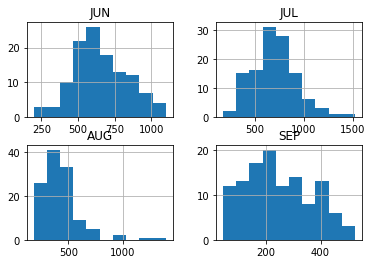

In [18]:
import matplotlib.pyplot as plt   
# sets the backend of matplotlib to the 'inline' backend. 
%matplotlib inline                   
c = data[['JUN','JUL','AUG','SEP']]
c.hist()
plt.show()
# How the rainfall index vary during rainy season

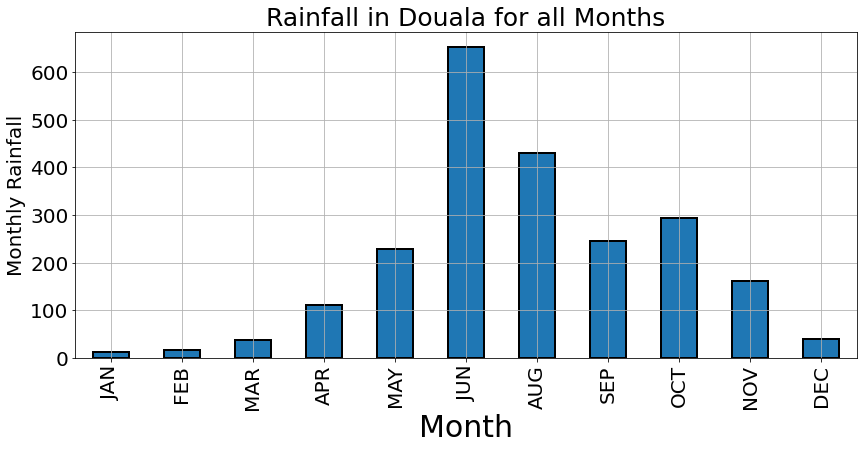

In [19]:
ax = data[['JAN', 'FEB', 'MAR', 'APR','MAY', 'JUN', 'AUG', 'SEP', 'OCT','NOV','DEC']].mean().plot.bar(width=0.5,edgecolor='k',align='center',linewidth=2,figsize=(14,6))
plt.xlabel('Month',fontsize=30)
plt.ylabel('Monthly Rainfall',fontsize=20)
plt.title('Rainfall in Douala for all Months',fontsize=25)
ax.tick_params(labelsize=20)
plt.grid()
plt.ioff()

# Using sklearn to develop the ML Model

In [20]:
# Scaling the data between 0 and 1.
from sklearn import preprocessing
minmax = preprocessing.MinMaxScaler(feature_range=(0,1))
minmax.fit(x).transform(x)

array([[0.        , 0.34371257, 0.56582278, ..., 0.39727673, 0.95570189,
        0.2388724 ],
       [0.00854701, 0.08023952, 0.03291139, ..., 0.5804966 , 0.37952709,
        0.60039565],
       [0.01709402, 0.03832335, 0.23544304, ..., 0.57188626, 0.37563604,
        0.29129575],
       ...,
       [0.98290598, 0.02874251, 0.04810127, ..., 0.31517821, 0.28105358,
        0.11622156],
       [0.99145299, 0.02275449, 0.08607595, ..., 0.24809772, 0.18258007,
        0.18793274],
       [1.        , 0.34850299, 0.65949367, ..., 0.57589107, 0.28105358,
        0.3214639 ]])

In [21]:
#dividing the dataset into training dataset and test dataset. 
from sklearn import model_selection,neighbors
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
x_train.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
90,1991,10.9,4.4,33.2,97.0,113.4,1096.1,905.5,465.5,48.5,307.8,99.9,2.3
36,1937,6.5,21.2,58.7,175.5,137.1,485.6,970.5,281.2,139.8,401.9,121.0,19.1
18,1919,43.0,6.1,33.9,65.9,247.0,636.8,648.0,484.2,255.9,249.2,280.1,53.0
27,1928,12.7,65.9,51.3,121.1,81.9,590.7,420.6,553.2,75.9,321.5,155.2,52.7
48,1949,0.6,1.8,4.5,98.1,440.0,536.3,758.7,445.2,354.5,229.1,71.9,1.8


In [22]:
x_train.dtypes

YEAR      int64
JAN     float64
FEB     float64
MAR     float64
APR     float64
MAY     float64
JUN     float64
JUL     float64
AUG     float64
SEP     float64
OCT     float64
NOV     float64
DEC     float64
dtype: object

In [23]:
x_test.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
95,1996,2.8,9.1,14.4,124.3,74.3,572.4,696.0,327.4,342.7,294.1,89.9,62.5
96,1997,2.1,1.5,36.1,60.6,133.6,544.2,970.5,536.0,292.2,288.9,298.4,88.4
53,1954,23.5,2.8,90.6,136.9,179.5,798.3,640.5,467.0,201.6,303.1,31.6,62.5
32,1933,1.0,9.3,36.9,139.5,738.8,859.3,773.4,479.5,469.7,397.0,126.1,42.3
108,2009,3.3,1.5,62.6,69.0,191.6,438.2,924.9,269.3,326.5,205.2,274.4,44.2


In [24]:
# type casting.
y_train=y_train.astype('int')
y_train

90     1
36     0
18     1
27     0
48     1
      ..
29     1
46     1
94     0
15     1
104    1
Name: FLOODS, Length: 94, dtype: int32

In [25]:
y_test=y_test.astype('int')
y_test

95     0
96     1
53     1
32     1
108    0
5      0
67     1
70     1
21     1
107    0
98     0
8      1
83     0
58     1
64     0
74     1
40     1
39     1
100    0
111    0
14     1
54     1
117    1
25     1
Name: FLOODS, dtype: int32

# Using Prediction Algorithms:

## KNN classifier to predict

In [26]:
clf=neighbors.KNeighborsClassifier()
clf.fit(x_train,y_train)

KNeighborsClassifier()

In [27]:
# Predicted chance of Flood.
print("Predicted Values for the Floods:")
y_predict=clf.predict(x_test)
y_predict

Predicted Values for the Floods:


array([0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0])

In [28]:
print("Actual Values for the Floods:")
print(y_test)

Actual Values for the Floods:
95     0
96     1
53     1
32     1
108    0
5      0
67     1
70     1
21     1
107    0
98     0
8      1
83     0
58     1
64     0
74     1
40     1
39     1
100    0
111    0
14     1
54     1
117    1
25     1
Name: FLOODS, dtype: int32


In [29]:
print("List of the Predicted Values:")
print(y_predict)

List of the Predicted Values:
[0 1 0 1 1 0 1 1 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0]


In [30]:
# Scaling the dataset.
from sklearn.model_selection import cross_val_score,cross_val_predict
x_train_std= minmax.fit_transform(x_train)
x_test_std= minmax.fit_transform(x_test)
knn_acc=cross_val_score(clf,x_train_std,y_train,cv=3,scoring='accuracy',n_jobs=-1)
knn_proba=cross_val_predict(clf,x_train_std,y_train,cv=3,method='predict_proba')

In [31]:
knn_acc

array([0.65625   , 0.83870968, 0.70967742])

In [32]:
knn_proba

array([[0.6, 0.4],
       [0.8, 0.2],
       [0.6, 0.4],
       [0.8, 0.2],
       [0.6, 0.4],
       [1. , 0. ],
       [0.4, 0.6],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.4, 0.6],
       [1. , 0. ],
       [0.4, 0.6],
       [0.6, 0.4],
       [0.4, 0.6],
       [0.4, 0.6],
       [0.8, 0.2],
       [0.4, 0.6],
       [0.6, 0.4],
       [0.4, 0.6],
       [0.6, 0.4],
       [0. , 1. ],
       [0.4, 0.6],
       [0.4, 0.6],
       [0.4, 0.6],
       [0.6, 0.4],
       [0.8, 0.2],
       [0.8, 0.2],
       [0.8, 0.2],
       [0.4, 0.6],
       [0.8, 0.2],
       [0.4, 0.6],
       [1. , 0. ],
       [0.8, 0.2],
       [0.8, 0.2],
       [0.8, 0.2],
       [0.6, 0.4],
       [0.2, 0.8],
       [0.6, 0.4],
       [0.2, 0.8],
       [0.6, 0.4],
       [0.8, 0.2],
       [0.4, 0.6],
       [0.8, 0.2],
       [0.8, 0.2],
       [0.4, 0.6],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.8, 0.2],
       [1. ,

### How accurate is our model?

In [33]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
print("\nAccuracy Score:%f"%(accuracy_score(y_test,y_predict)*100))
print("Recall Score:%f"%(recall_score(y_test,y_predict)*100))
print("ROC score:%f"%(roc_auc_score(y_test,y_predict)*100))
print(confusion_matrix(y_test,y_predict))


Accuracy Score:83.333333
Recall Score:80.000000
ROC score:84.444444
[[ 8  1]
 [ 3 12]]


## Logistic Regression to predict

In [34]:
x_train_std=minmax.fit_transform(x_train)         # fit the values in between 0 and 1.
y_train_std=minmax.transform(x_test)

from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr_acc=cross_val_score(lr,x_train_std,y_train,cv=3,scoring='accuracy',n_jobs=-1)
lr_proba=cross_val_predict(lr,x_train_std,y_train,cv=3,method='predict_proba')

In [35]:
lr_acc

array([0.78125   , 0.90322581, 0.83870968])

In [36]:
lr_proba

array([[0.50684739, 0.49315261],
       [0.61874763, 0.38125237],
       [0.35316561, 0.64683439],
       [0.67964238, 0.32035762],
       [0.49049638, 0.50950362],
       [0.78952271, 0.21047729],
       [0.42566947, 0.57433053],
       [0.75681744, 0.24318256],
       [0.53728079, 0.46271921],
       [0.64453085, 0.35546915],
       [0.71408506, 0.28591494],
       [0.78706458, 0.21293542],
       [0.3238235 , 0.6761765 ],
       [0.78107341, 0.21892659],
       [0.27102284, 0.72897716],
       [0.50466237, 0.49533763],
       [0.43323953, 0.56676047],
       [0.49363546, 0.50636454],
       [0.83530166, 0.16469834],
       [0.51557568, 0.48442432],
       [0.49180068, 0.50819932],
       [0.41429279, 0.58570721],
       [0.60571081, 0.39428919],
       [0.11491011, 0.88508989],
       [0.38985339, 0.61014661],
       [0.44799782, 0.55200218],
       [0.37947693, 0.62052307],
       [0.56788713, 0.43211287],
       [0.67814973, 0.32185027],
       [0.6505961 , 0.3494039 ],
       [0.

In [37]:
y_pred=lr.predict(x_test)
y_pred

array([0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1])

In [38]:
print(y_test.values)

[0 1 1 1 0 0 1 1 1 0 0 1 0 1 0 1 1 1 0 0 1 1 1 1]


In [39]:
print("List of the Predicted Values:")
print(y_pred)

List of the Predicted Values:
[0 1 0 1 0 0 1 1 1 0 0 1 0 1 0 1 1 1 1 0 1 1 1 1]


### Accuracy and Efficiency of our Model 

In [40]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
print("\naccuracy score:%f"%(accuracy_score(y_test,y_pred)*100))
print("recall score:%f"%(recall_score(y_test,y_pred)*100))
print("roc score:%f"%(roc_auc_score(y_test,y_pred)*100))
print(confusion_matrix(y_test,y_pred))


accuracy score:91.666667
recall score:93.333333
roc score:91.111111
[[ 8  1]
 [ 1 14]]


## Support Vector Classification to predict

In [41]:
from sklearn.svm import SVC
svc=SVC(kernel='rbf',probability=True)
svc_classifier=svc.fit(x_train,y_train)
svc_acc=cross_val_score(svc_classifier,x_train_std,y_train,cv=3,scoring="accuracy",n_jobs=-1)
svc_proba=cross_val_predict(svc_classifier,x_train_std,y_train,cv=3,method='predict_proba')

In [42]:
svc_acc

array([0.78125   , 0.90322581, 0.80645161])

In [43]:
svc_proba

array([[2.00814359e-01, 7.99185641e-01],
       [8.55555280e-01, 1.44444720e-01],
       [1.26603891e-01, 8.73396109e-01],
       [8.61653120e-01, 1.38346880e-01],
       [5.00000000e-01, 5.00000000e-01],
       [9.89946918e-01, 1.00530815e-02],
       [2.19660687e-01, 7.80339313e-01],
       [9.76104317e-01, 2.38956831e-02],
       [5.27497516e-01, 4.72502484e-01],
       [9.81077976e-01, 1.89220239e-02],
       [9.89233799e-01, 1.07662010e-02],
       [9.82485499e-01, 1.75145008e-02],
       [7.16724584e-02, 9.28327542e-01],
       [9.89054071e-01, 1.09459288e-02],
       [6.58838827e-02, 9.34116117e-01],
       [4.57612455e-01, 5.42387545e-01],
       [3.73063382e-01, 6.26936618e-01],
       [2.23814244e-01, 7.76185756e-01],
       [9.88744268e-01, 1.12557318e-02],
       [1.60073977e-01, 8.39926023e-01],
       [3.19159079e-01, 6.80840921e-01],
       [3.85075253e-01, 6.14924747e-01],
       [7.36671588e-01, 2.63328412e-01],
       [3.54156039e-03, 9.96458440e-01],
       [1.339804

In [44]:
svc_scores=svc_proba[:,1]
svc_scores

array([0.79918564, 0.14444472, 0.87339611, 0.13834688, 0.5       ,
       0.01005308, 0.78033931, 0.02389568, 0.47250248, 0.01892202,
       0.0107662 , 0.0175145 , 0.92832754, 0.01094593, 0.93411612,
       0.54238755, 0.62693662, 0.77618576, 0.01125573, 0.83992602,
       0.68084092, 0.61492475, 0.26332841, 0.99645844, 0.86601952,
       0.74308403, 0.88842147, 0.58081906, 0.26279987, 0.2845708 ,
       0.44620658, 0.51654381, 0.27563884, 0.61415417, 0.76309399,
       0.2786503 , 0.29517559, 0.16378467, 0.35410384, 0.99998327,
       0.90852363, 0.97357678, 0.46858282, 0.16365646, 0.90969393,
       0.25266639, 0.211578  , 0.92885842, 0.02672319, 0.55762489,
       0.05809587, 0.07053999, 0.17159143, 0.9438396 , 0.37330129,
       0.01407352, 0.90826695, 0.85316035, 0.88754979, 0.66650084,
       0.02809886, 0.85361109, 0.14252926, 0.42448199, 0.64592753,
       0.66107839, 0.28045108, 0.85120629, 0.01843459, 0.84585022,
       0.89520748, 0.95513536, 0.72076051, 0.09282612, 0.92124

In [45]:
y_pred=svc_classifier.predict(x_test)
print("Actual Flood Values:")
print(y_test.values)

Actual Flood Values:
[0 1 1 1 0 0 1 1 1 0 0 1 0 1 0 1 1 1 0 0 1 1 1 1]


In [46]:
print("Predicted Flood Values:")
print(y_pred)

Predicted Flood Values:
[0 1 0 1 0 0 1 1 1 0 0 1 0 1 0 1 1 1 0 0 1 1 1 1]


### Accuracy of our model

In [47]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
print("\naccuracy score:%f"%(accuracy_score(y_test,y_pred)*100))
print("recall score:%f"%(recall_score(y_test,y_pred)*100))
print("roc score:%f"%(roc_auc_score(y_test,y_pred)*100))
print(confusion_matrix(y_test,y_pred))


accuracy score:95.833333
recall score:93.333333
roc score:96.666667
[[ 9  0]
 [ 1 14]]


# Decision Tree Classification to Predict

In [48]:
from sklearn.tree import DecisionTreeClassifier
dtc_clf=DecisionTreeClassifier()
dtc_clf.fit(x_train,y_train)
dtc_clf_acc=cross_val_score(dtc_clf,x_train_std,y_train,cv=3,scoring="accuracy",n_jobs=-1)
dtc_clf_acc

array([0.6875    , 0.77419355, 0.90322581])

In [49]:
print("Predicted Values:")
y_pred=dtc_clf.predict(x_test)
y_pred

Predicted Values:


array([0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1])

In [50]:
print("Actual Values:")
print(y_test.values)

Actual Values:
[0 1 1 1 0 0 1 1 1 0 0 1 0 1 0 1 1 1 0 0 1 1 1 1]


### Printing the Accuracy

In [51]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
print("\naccuracy score:%f"%(accuracy_score(y_test,y_pred)*100))
print("recall score:%f"%(recall_score(y_test,y_pred)*100))
print("roc score:%f"%(roc_auc_score(y_test,y_pred)*100))
print(confusion_matrix(y_test,y_pred))


accuracy score:70.833333
recall score:80.000000
roc score:67.777778
[[ 5  4]
 [ 3 12]]


# Random Forest Classifier to predict

In [52]:
from sklearn.ensemble import RandomForestClassifier
rmf=RandomForestClassifier(max_depth=3,random_state=0)
rmf_clf=rmf.fit(x_train,y_train)
rmf_clf

RandomForestClassifier(max_depth=3, random_state=0)

In [53]:
rmf_clf_acc=cross_val_score(rmf_clf,x_train_std,y_train,cv=3,scoring="accuracy",n_jobs=-1)
rmf_proba=cross_val_predict(rmf_clf,x_train_std,y_train,cv=3,method='predict_proba')

In [54]:
rmf_clf_acc

array([0.75      , 0.90322581, 0.67741935])

In [55]:
rmf_proba

array([[0.40487104, 0.59512896],
       [0.57780457, 0.42219543],
       [0.33152046, 0.66847954],
       [0.65443799, 0.34556201],
       [0.59171409, 0.40828591],
       [0.67146332, 0.32853668],
       [0.59150263, 0.40849737],
       [0.78384935, 0.21615065],
       [0.66737326, 0.33262674],
       [0.75275024, 0.24724976],
       [0.63133289, 0.36866711],
       [0.77671125, 0.22328875],
       [0.29627772, 0.70372228],
       [0.72660299, 0.27339701],
       [0.3504121 , 0.6495879 ],
       [0.5068105 , 0.4931895 ],
       [0.56140078, 0.43859922],
       [0.5638743 , 0.4361257 ],
       [0.79071984, 0.20928016],
       [0.49916083, 0.50083917],
       [0.58411117, 0.41588883],
       [0.3570393 , 0.6429607 ],
       [0.53140288, 0.46859712],
       [0.14218795, 0.85781205],
       [0.47332124, 0.52667876],
       [0.47729002, 0.52270998],
       [0.30017793, 0.69982207],
       [0.67974349, 0.32025651],
       [0.65014693, 0.34985307],
       [0.52689184, 0.47310816],
       [0.

In [56]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
print("\naccuracy score:%f"%(accuracy_score(y_test,y_pred)*100))
print("recall score:%f"%(recall_score(y_test,y_pred)*100))
print("roc score:%f"%(roc_auc_score(y_test,y_pred)*100))
print(confusion_matrix(y_test,y_pred))


accuracy score:70.833333
recall score:80.000000
roc score:67.777778
[[ 5  4]
 [ 3 12]]


# Final Accuracy of our Models 

### Comparing all the prediction models

In [57]:
models = []
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
models.append(('KNN', KNeighborsClassifier()))
models.append(('LR', LogisticRegression()))
models.append(('SVC', SVC()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))

names = []
scores = []
for name, model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)
tr_split = pd.DataFrame({'Name': names, 'Score': scores})
tr_split

,Name,Score
0,KNN,0.833333
1,LR,0.916667
2,SVC,0.958333
3,DT,0.750000
4,RF,0.875000


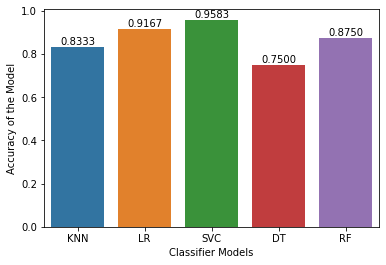

In [58]:
import seaborn as sns
axis = sns.barplot(x = 'Name', y = 'Score', data =tr_split )
axis.set(xlabel='Classifier Models', ylabel='Accuracy of the Model')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.01, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

In [67]:
tr_split['Score'].max() 

0.9166666666666666

### So we can see and choose the best model for Prediction.

# End of the Code.

In [69]:
#import numpy as np
#import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#data1 = pd.read_csv('saaty.csv')
#print(data1)